In [2]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_text


<Figure size 432x216 with 0 Axes>

Importing Dataset
Importing the dataset using the kaggle api. and after downloading it and extracting it we can use pandas module in python to import it

In [3]:
! mkdir ~/.kaggle 

In [6]:
! cp kaggle.json ~/.kaggle/


In [7]:
! kaggle datasets download mlg-ulb/creditcardfraud

 97% 64.0M/66.0M [00:00<00:00, 79.1MB/s]
100% 66.0M/66.0M [00:00<00:00, 84.7MB/s]


In [8]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [9]:
df=pd.read_csv('/content/creditcard.csv')

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As per the count per column, we have no null values. Also, feature selection is not the case for this use case. Anyway, you can try applying feature selection mechanisms to check if the results are optimised.
I have observed in our data 28 features are transformed versions of PCA but the Amount is the original one. And, while checking the minimum and maximum is in the amount — I found the difference is huge that can deviate our result.

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data Preprocessing 

In [13]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions)))
print(cl('Number of Normal Transactions are {}'.format(normal)))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent)))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage)))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [14]:
print('min amount:',min(df.Amount))
print('max amount:',max(df.Amount))

min amount: 0.0
max amount: 25691.16


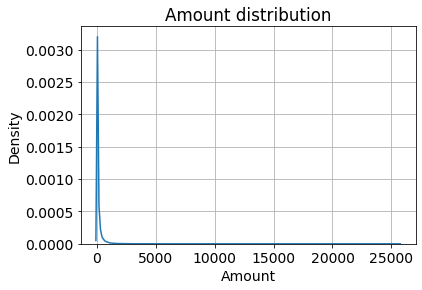

In [15]:
sns.kdeplot(x='Amount', data=df)
plt.title('Amount distribution')
plt.show()

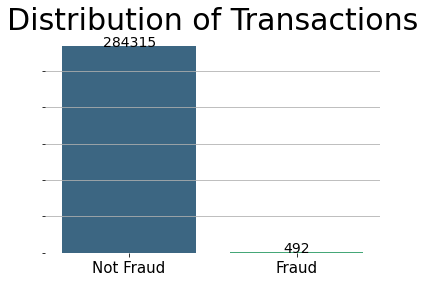

In [16]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(df.Class, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [17]:
df.drop(['Time'], axis=1, inplace=True)


In [18]:
df.shape

(284807, 30)

In [19]:
df.drop_duplicates(inplace=True)


In [20]:
df.shape

(275663, 30)

In [21]:
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Model Building


In [22]:
#decision tree
dtclf = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dtclf.fit(X_train, y_train)
dtclf_predict = dtclf.predict(X_test)

In [23]:
print('Unique predicted labels: ', (np.unique(dtclf_predict)))


Unique predicted labels:  [0 1]


In [24]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test,dtclf_predict )))

Accuracy score of the Decision Tree model is 0.9993615415868594


In [25]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test,dtclf_predict)))

F1 score of the Decision Tree model is 0.7962962962962963


In [26]:
confusion_matrix(y_test, dtclf_predict, labels = [0, 1])


array([[68786,    15],
       [   29,    86]])

In [27]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_predict = KNN.predict(X_test)

In [28]:
print('Unique predicted labels: ', (np.unique(knn_predict)))


Unique predicted labels:  [0 1]


In [29]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test,knn_predict)))

Accuracy score of the K-Nearest Neighbors model is 0.999318010331418


In [30]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_predict)))

F1 score of the K-Nearest Neighbors model is 0.7614213197969543


In [31]:
#logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict= lr.predict(X_test)

In [32]:
print('Unique predicted labels: ', (np.unique(lr_predict)))


Unique predicted labels:  [0 1]


In [33]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test,lr_predict)))

Accuracy score of the Logistic Regression model is 0.99907133321725


In [34]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test,lr_predict)))

F1 score of the Logistic Regression model is 0.68


In [35]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':lr_predict})
df

,Real Values,Predicted Values
33142,0,0
239748,0,0
281082,0,0
186668,0,0
101248,0,0
...,...,...
220199,0,0
214956,0,0
3346,0,0
19308,0,0


In [36]:
#svm
svm = SVC()
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)

In [37]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_predict)))

Accuracy score of the Support Vector Machines model is 0.9987666144291601


In [38]:
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_predict)))

F1 score of the Support Vector Machines model is 0.49101796407185627


In [39]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

In [40]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_predict)))

Accuracy score of the Random Forest model is 0.9993905624238203


In [41]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_predict)))

F1 score of the Random Forest model is 0.792079207920792


In [42]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)

In [43]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_predict)))

Accuracy score of the XGBoost model is 0.9995501770271055


In [44]:
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_predict)))

F1 score of the XGBoost model is 0.8502415458937198


Always split into test and train sets BEFORE trying any resampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets! This can allow our model to simply memorize specific data points and cause overfitting.

In [45]:
df=pd.read_csv('/content/creditcard.csv')

In [46]:
from sklearn.utils import resample


# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

In [47]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [48]:
#ACCURACY SCORE
accuracy_score(y_test, upsampled_pred)


0.9807589674447347

In [49]:
#F1 SCORE
f1_score(y_test, upsampled_pred)


0.14375000000000002

In [50]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))


,0,1
0,69717,1353
1,17,115


In [51]:
#RECALL SCORE
from sklearn.metrics import recall_score
recall_score(y_test, upsampled_pred)


0.8712121212121212

Our accuracy score decreased after upsampling, but the model is now predicting both classes more equally, making it an improvement over our plain logistic regression above.



In [ ]:
#svm
svm = SVC()
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)

In [ ]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_predict)))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_predict)))
print('confusion matric:',confusion_matrix(y_test, dtclf_predict, labels = [0, 1]))
print('recall score:',recall_score(y_test, upsampled_pred))

Undersampling Majority Class:
Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

We will again use the resampling module from Scikit-Learn to randomly remove samples from the majority class.

In [52]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [53]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)


In [54]:
print('Accuracy score of the logistic regression model is {}'.format(accuracy_score(y_test, undersampled_pred)))
print('F1 score of the Logistic regression model is {}'.format(f1_score(y_test,undersampled_pred)))
print('confusion matric:',confusion_matrix(y_test, undersampled_pred, labels = [0, 1]))
print('recall score:',recall_score(y_test, undersampled_pred))

Accuracy score of the logistic regression model is 0.9758574197354007
F1 score of the Logistic regression model is 0.11710323574730355
confusion matric: [[69369  1701]
 [   18   114]]
recall score: 0.8636363636363636


Generate Synthetic Samples
SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.

In [59]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [60]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9858571388444145

In [61]:
print('Accuracy score of the logistic regression model is {}'.format(accuracy_score(y_test, undersampled_pred)))
print('F1 score of the Logistic regression model is {}'.format(f1_score(y_test,undersampled_pred)))
print('confusion matric:',confusion_matrix(y_test, undersampled_pred, labels = [0, 1]))
print('recall score:',recall_score(y_test, undersampled_pred))

Accuracy score of the logistic regression model is 0.9758574197354007
F1 score of the Logistic regression model is 0.11710323574730355
confusion matric: [[69369  1701]
 [   18   114]]
recall score: 0.8636363636363636


These are just some of the many possible methods to try when dealing with imbalanced datasets, and not an exhaustive list. Some others methods to consider are collecting more data or choosing different resampling ratios - you don't have to have exactly a 1:1 ratio! You should always try several approaches and then decide which is best for your problem.